# Maximum Likelihood estimation example

The theory says that if we have i.i.d. samples $\{ x_1, x_2, ..., x_N \}$ of a particular parametrical distribution $f(x \mid \theta)$ and we want to estimate parameters $\theta$ such that they best fit the samples, thus we use the principle of the maximum likelihood:
$$
\theta_{ML} = \text{argmax}_{\theta}\left( \prod_{i=1}^{N}f(x_i \mid \theta) \right) \rightarrow \text{argmax}_{\theta}\left( \sum_{i=1}^{N} \ln f(x_i \mid \theta) \right) 
$$

where the product $\prod_{i=1}^{N}f(x_i \mid \theta)$ defines the likelihood of observing all samples given parameters $\theta$. 

The second term is called log-likelihood, defined as $\mathcal{L}(\theta ; x_1, x_2,... x_N) = \sum_{i=1}^{N} \ln f(x_i \mid \theta)$. The maximum of the log-likelihood corresponds to the best parameters fit.

- Why should we search for the maximum ?

Let's explore this theory on a concrete example of 1D normal distribution. 

Reference:
- [wiki](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)


In [4]:
import numpy as np
from scipy.stats import norm

In [32]:
# Samples 
n = 1000
mu = 5.0
sigma = 2.0
x = sigma * np.random.randn(n) + mu
x.shape

(1000,)

Let's compute probability $f(x \mid \theta)$ for a given sample $x$ and some parameters $\theta$:

In [33]:
x[0], np.log(norm.pdf(x[0], loc=0.123, scale=1.234))

(1.7713648824238732, -2.0213669450114393)

Let's compute log-likelihood on the whole dataset:

In [34]:
np.sum(np.log(norm.pdf(x, loc=0.123, scale=1.234)))

-10302.41643647976

We can vary the parameters $\theta$ (here `loc` and `scale`) to inspect the values of the log-likelihood:

In [35]:
import matplotlib.pylab as plt
%matplotlib inline

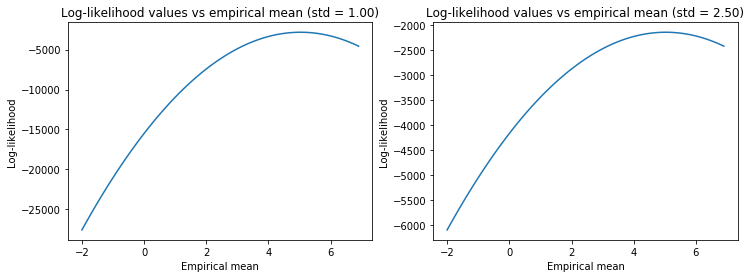

In [36]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
locs = np.arange(-2.0, 7.0, 0.1)
scale = 1.0
loglikelihoods = [np.sum(np.log(norm.pdf(x, loc=loc, scale=scale))) for loc in locs]
plt.plot(locs, loglikelihoods)
plt.xlabel("Empirical mean")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood values vs empirical mean (std = %.2f)" % scale)

plt.subplot(122)
locs = np.arange(-2.0, 7.0, 0.1)
scale = 2.5
loglikelihoods = [np.sum(np.log(norm.pdf(x, loc=loc, scale=scale))) for loc in locs]
plt.plot(locs, loglikelihoods)
plt.xlabel("Empirical mean")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood values vs empirical mean (std = %.2f)" % scale)

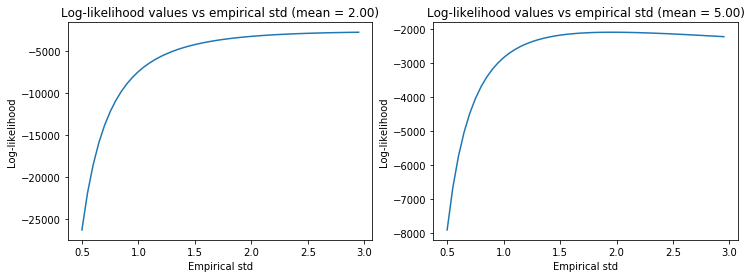

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(121)

scales = np.arange(0.5, 3.0, 0.05)
loc = 2.0
loglikelihoods = [np.sum(np.log(norm.pdf(x, loc=loc, scale=scale))) for scale in scales]
plt.plot(scales, loglikelihoods)
plt.xlabel("Empirical std")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood values vs empirical std (mean = %.2f)" % loc)

plt.subplot(122)
scales = np.arange(0.5, 3.0, 0.05)
loc = 5.0
loglikelihoods = [np.sum(np.log(norm.pdf(x, loc=loc, scale=scale))) for scale in scales]
plt.plot(scales, loglikelihoods)
plt.xlabel("Empirical std")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood values vs empirical std (mean = %.2f)" % loc)

We observe that the maximum of the log-likelihood is achieved when estimated parameters $\theta$ are close to theoretical values: $\mu=5$ and $\sigma = 2$.

Analytical solution for the estimated parameters $\hat\mu$ and $\hat \sigma^2$ are given by equations:
$$
\hat\mu = \frac{1}{N} \sum_{i=1}^{N}(x_i) \\
\hat\sigma^2 = \frac{1}{N} \sum_{i=1}^{N}(x_i - \hat\mu)^2
$$

In [38]:
mle_mean = np.mean(x)
mle_sigma = np.std(x)
mle_mean, mle_sigma

(5.0325183990918179, 1.9580019084382578)